In [2]:
## 1. Load libraries and set env 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from dateutil.parser import parse

%matplotlib inline 
plt.style.use('seaborn-white')

sns.set(color_codes=True)



In [3]:
## 2. Load Dataset
DATA_DIR = "../DS_Certification/datasets"
DATA_FILE = "all_KE_CHVs_data_1493.csv" 

dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )


# Introduction 
This is a quick peak into the data we collect on assessments and sales for all 1493 CHPs to date. 

## Questions 
1. What improves sales?
2. How well are we doing with the core diseases?
3. What drives referrals?
4. What relationships between the different disease/assessment types?
5. How relates to Equity Lens findings?


## Approach
- Correlations 
- Logit regression 

## Themes
- Pregnancy --> registration, PNC visits 
- Diseases --> Malaria, Diarrhoea, Pneumonia, 
- Assessments --> Assessment, Treatment, Referral f/u, Visits
- Operations --> Sales, Community Events, HH registrations 



In [4]:
## The groupings/themes
pregoz = ["Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"] 
U1s = ["Total U1 Assessments", "Total U1 Treatments"]
U5s = ["Total U5 Assessments", "Total U5 Treatments", "On Time Referral f/u Treatment U5", "Missed Visits" ] 
malaria = ["All Malaria Assessments", "All Malaria Treatments", "U5 Malaria", "%mRDT", "Act 6pack Issue", "mRDT Used"]
U5diseases = [ "U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"] 
Ops = [ "Households Registered","Sales", "Community Events"] 

# What the data looks like
- Sample structure
- Limitations 
- Summary stats & distributions 




## Sample Structure
- Data not mapped to branches and districts
- Sample details on # CHPs and households 

In [5]:
print("CHP and Household Numbers ")
dataset['Households Registered'].describe()

CHP and Household Numbers 


count    1493.000000
mean       99.099799
std        48.424606
min         0.000000
25%        75.000000
50%       100.000000
75%       125.000000
max       356.000000
Name: Households Registered, dtype: float64

In [6]:
print("n by diseases") 
dataset[U5diseases].describe()

n by diseases


,U5 Malaria,U5 Diarrhea,U5 Pneumonia
count,1493.000000,1493.000000,1493.000000
mean,1.004689,0.334226,0.356330
std,2.155635,0.807231,0.943594
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,18.000000,10.000000,10.000000


## Limitations 
- Doesn't recognize geographic differeces b/c no branch and district mapping in place to help explore that 
- 

## Distributions 
**Summary Findings**
- We're more consistent in health related activities and particularly, household registration and assessments than sales related activities
    - Household registrations and U5 assessments demonstrate more of a normal curve. 
    - Sales and community events are skewed to low 
- Conversion rates of assessments to treatments and follow-up activities get worse as wo traverse the series
    - Assumes an overarching sequential path from assessment to treatment then referral and health facility visits
    - Assessments have more normal curves while visits have skewed to low visits 


The Distribution plots of interest as corr matrices too???


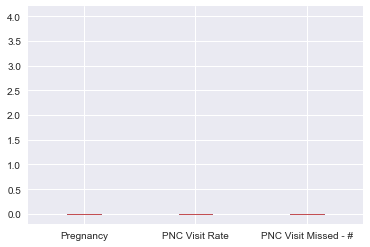

In [7]:
print("The Distribution plots of interest as corr matrices too???")
# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4) 
# fig.add_subplot(2,3, 1).figure(  )
dataset[pregoz[:]].boxplot() 

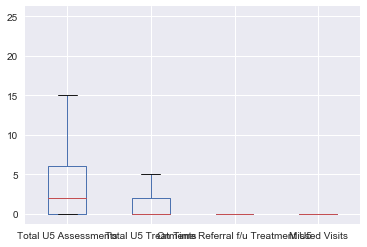

In [8]:
dataset[U5s].boxplot() 

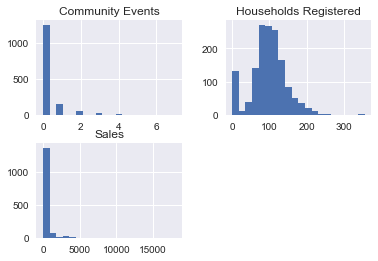

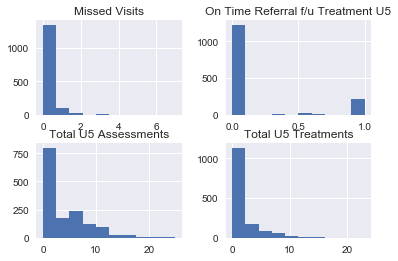

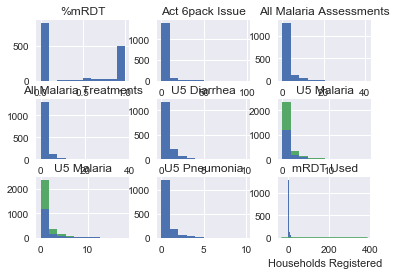

In [9]:
dataset[Ops].hist(stacked=True, bins=20)  
dataset[U5s ].hist(stacked=True, bins=10) 
dataset[U5diseases + malaria].hist(stacked=True, bins=10)  

sns.distplot( dataset['Households Registered'])

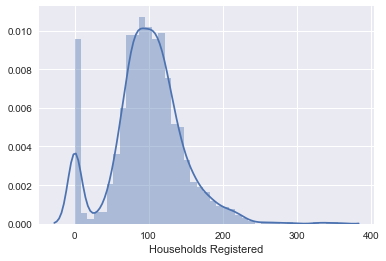

In [10]:
sns.distplot( dataset['Households Registered'] )

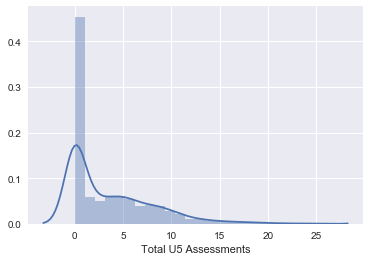

In [11]:
sns.distplot( dataset['Total U5 Assessments'] )

In [12]:
## Trim outliers based on HH registered??? 
#dataset.drop( dataset['Households Registered'] <= 0, inplace=True )  
dataset = dataset[ dataset['Households Registered'] >= 5 ] 
dataset.shape

(1371, 21)

In [13]:
dataset.describe()

,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,On Time Referral f/u Treatment U5,Missed Visits,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.297593,0.140287,0.160467,0.886944,0.362509,3.933625,1.846098,1.094092,0.363968,0.388038,0.177153,0.167761,0.434290,2.177972,1.482859,2.938001,2.177972,335.854384,0.280088,107.908096
std,0.644223,0.339784,0.412131,1.338775,0.823396,4.464700,2.895822,2.227706,0.835953,0.978441,0.368479,0.582854,0.469768,3.959519,3.260508,7.278392,3.959519,1104.164771,0.718091,40.044486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,3.000000,3.000000,190.550000,0.000000,127.000000
max,4.000000,1.000000,3.000000,9.000000,6.000000,25.000000,23.000000,18.000000,10.000000,10.000000,1.000000,7.000000,1.000000,41.000000,38.000000,99.000000,41.000000,18032.340000,7.000000,356.000000


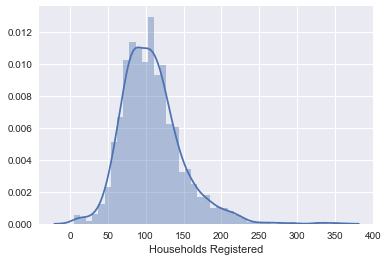

In [14]:
sns.distplot( dataset['Households Registered'] )

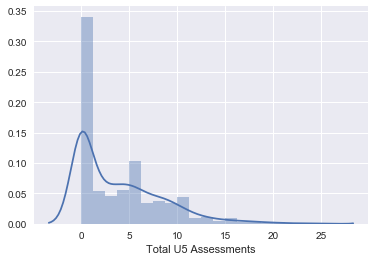

In [15]:
sns.distplot( dataset['Total U5 Assessments'] )

## Correlations
- Within a theme 
    - E.g. within pregnancy or malaria variables 
- Between themes
    - pregnancy assessments and U5 assessments

### Within A Theme
1. Operations 
2. Assessments
3. Pregnancy
4. Diseases 

**Highlights** 
- We know how to do malaria well
    - Malaria has the correlation values; shows strong correlation within its measures compared to others
    - Malaria workflow is followed
        - Each malaria treatement gets an mRDT and ACT 6pack consistenty
    - Recorded malaria cases are driven by care to children. 
    - referral cases correlate more with pneumonia and diarrhea 

- Sales continues to be a challenge
    - Community events are not driving sales but may have potential to do so 
    - Sales do not correlate with registered households. 
        - TBD: are sales records tied to HH profiles? 
        - 

- Pregnancy registration and support seem to be tied to whether a household already has children OR vice versa. 
    - Pregnancy registrations correlate more with total U5 assessments 
    - 
    - PS: Equity lens data suggested that CHPs prioritize poorer and less educated househodls for some reason
    - The magnitudes are below 0.32, which is usually the threshold for existence of a relationship. 
        - TBD: but could also be b/c of nature of our data
        
- Total children assessments are driven by U1s and relate to Malaria cases
    - Malaria treatement services seems to do we and referral cases relate more to the other diseases (pneumonia and diarrhoea) 

- Community events seem to be more tied to child care delivery or assessments than to generating sales or new household registration 
    - Community events have a strong correlation with U5 assessments (and of course U1s) compared to sales and household registration at 0.31 Vs 0.14 and 0.1 respectively << How do we record the events and what's the flow of activities with household registration 
    



**Questions** 
Malaria 
- Should we extend malaria to all not just children?
- Impact & pricing - there's clear demand and proper usage. So, should we offer malaria treatment fully free or not? 
    -Also, what would we find if we recorded all malaria cases CHVs attend to and not just for U5s?
- Could it be that care for other diseases is not as strongly related b/c there's no comprehensive support/end-point by the CHP OR b/c referral is not as strong, which is the main end-point for the other diseases? 
    
Sales
- Empower community events and drive sales outside of HH visits/registration activities
    - anybody from anywhere can buy? 
    
Pregnancy
- Expand registration to outside of households that already have children.
    - How do we capture new mothers/families/households? << Anything to do with traditions? 



In [16]:
print("Correlate pregnancies with Ops and U5 activity and disease type")
cor_pregoz = dataset[pregoz+Ops+U5s+U5diseases].corr()
cor_pregoz

Correlate pregnancies with Ops and U5 activity and disease type


,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Households Registered,Sales,Community Events,Total U5 Assessments,Total U5 Treatments,On Time Referral f/u Treatment U5,Missed Visits,U5 Malaria,U5 Diarrhea,U5 Pneumonia
Pregnancy,1.000000,0.143152,-0.023287,0.139024,0.110135,0.091080,0.242884,0.214332,0.213579,0.111881,0.148316,0.161969,0.158276
PNC Visit Rate,0.143152,1.000000,-0.095717,0.092105,0.049711,0.132515,0.261515,0.184481,0.152058,0.047548,0.118356,0.161245,0.138760
PNC Visit Missed - #,-0.023287,-0.095717,1.000000,0.158657,0.035893,-0.077986,-0.073942,-0.069810,-0.063961,-0.011873,-0.045874,-0.038290,-0.069452
Households Registered,0.139024,0.092105,0.158657,1.000000,0.098095,0.041891,0.095868,0.146056,0.101176,0.080846,0.142110,0.092275,0.029880
Sales,0.110135,0.049711,0.035893,0.098095,1.000000,0.136516,0.086608,0.076525,0.053830,0.017802,0.028281,0.119228,0.060232
Community Events,0.091080,0.132515,-0.077986,0.041891,0.136516,1.000000,0.297905,0.166417,0.173349,0.041123,0.129983,0.075677,0.131931
Total U5 Assessments,0.242884,0.261515,-0.073942,0.095868,0.086608,0.297905,1.000000,0.684819,0.379037,0.222228,0.591995,0.370436,0.362472
Total U5 Treatments,0.214332,0.184481,-0.069810,0.146056,0.076525,0.166417,0.684819,1.000000,0.310838,0.221592,0.871455,0.511630,0.538386
On Time Referral f/u Treatment U5,0.213579,0.152058,-0.063961,0.101176,0.053830,0.173349,0.379037,0.310838,1.000000,0.031193,0.192282,0.223358,0.291349
Missed Visits,0.111881,0.047548,-0.011873,0.080846,0.017802,0.041123,0.222228,0.221592,0.031193,1.000000,0.090710,0.253608,0.232628


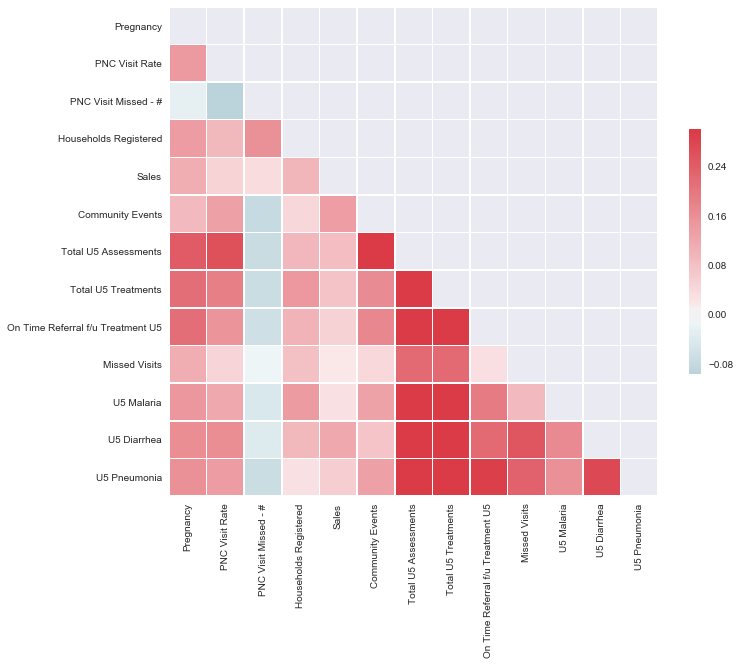

In [17]:
# Plot them Pregoz  
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_pregoz, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_pregoz, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
print("Correlate U5 assessments with Ops and diseases+U1s") 
cor_U5s = dataset[U5s+Ops+U5diseases+U1s].corr()
cor_U5s

Correlate U5 assessments with Ops and diseases+U1s


,Total U5 Assessments,Total U5 Treatments,On Time Referral f/u Treatment U5,Missed Visits,Households Registered,Sales,Community Events,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total U1 Assessments,Total U1 Treatments
Total U5 Assessments,1.000000,0.684819,0.379037,0.222228,0.095868,0.086608,0.297905,0.591995,0.370436,0.362472,0.760638,0.463224
Total U5 Treatments,0.684819,1.000000,0.310838,0.221592,0.146056,0.076525,0.166417,0.871455,0.511630,0.538386,0.508002,0.688013
On Time Referral f/u Treatment U5,0.379037,0.310838,1.000000,0.031193,0.101176,0.053830,0.173349,0.192282,0.223358,0.291349,0.427870,0.281711
Missed Visits,0.222228,0.221592,0.031193,1.000000,0.080846,0.017802,0.041123,0.090710,0.253608,0.232628,0.238538,0.230609
Households Registered,0.095868,0.146056,0.101176,0.080846,1.000000,0.098095,0.041891,0.142110,0.092275,0.029880,0.120915,0.136780
Sales,0.086608,0.076525,0.053830,0.017802,0.098095,1.000000,0.136516,0.028281,0.119228,0.060232,0.091692,0.088818
Community Events,0.297905,0.166417,0.173349,0.041123,0.041891,0.136516,1.000000,0.129983,0.075677,0.131931,0.246315,0.120730
U5 Malaria,0.591995,0.871455,0.192282,0.090710,0.142110,0.028281,0.129983,1.000000,0.169345,0.157709,0.412049,0.567551
U5 Diarrhea,0.370436,0.511630,0.223358,0.253608,0.092275,0.119228,0.075677,0.169345,1.000000,0.274298,0.291158,0.402024
U5 Pneumonia,0.362472,0.538386,0.291349,0.232628,0.029880,0.060232,0.131931,0.157709,0.274298,1.000000,0.316590,0.400591


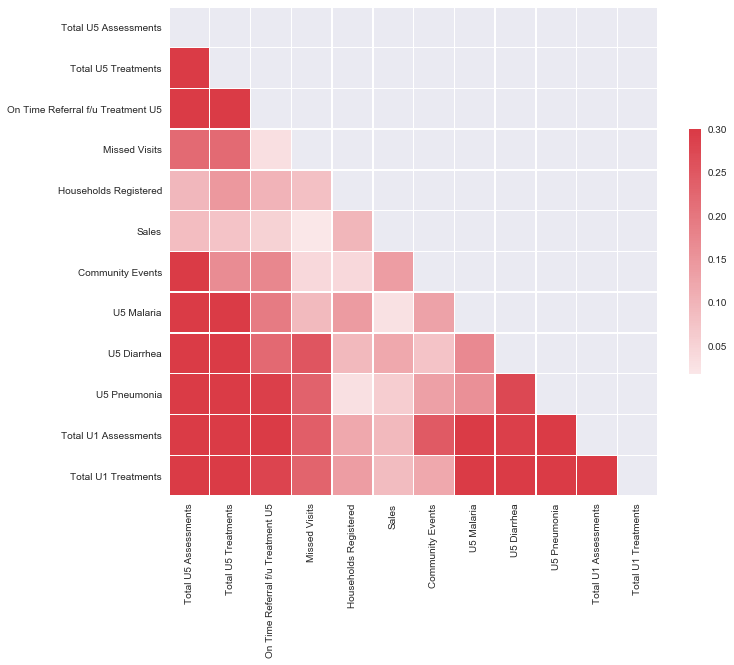

In [19]:
# Plot them Pregoz  
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_U5s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_U5s, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})